In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=ca9b6630ad9568bec09de42efac073d4b255ea2ddcbca8ab1baaad763880afab
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D,AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras
from sklearn import svm, metrics

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
2.2.0
time: 19 ms


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 8.13 ms


In [ ]:
DATA_PATH= 'drive/My Drive/MasterNU/RevisionBSLDigits/PickleData/'

time: 975 µs


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 3.17 s


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  10000
Length of y:  10000
time: 1.72 ms


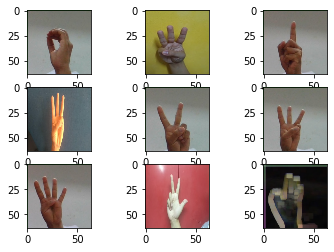

time: 896 ms


In [ ]:
# listRange = range(70, 79, 1)
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x[i])
plt.show()

In [ ]:
y[:9]

[0, 6, 1, 6, 2, 6, 4, 3, 9]

time: 5.62 ms


In [ ]:
x.shape

(10000, 64, 64, 3)

In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

time: 98.4 ms


In [ ]:
x.shape

(10000, 64, 64, 3)

time: 2.95 ms


In [ ]:
y.shape

(10000,)

In [ ]:
# x=x/255.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2)

time: 68.8 ms


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)

xtrain shape:  (8000, 64, 64, 3)
xtest shape:  (2000, 64, 64, 3)
time: 4.37 ms


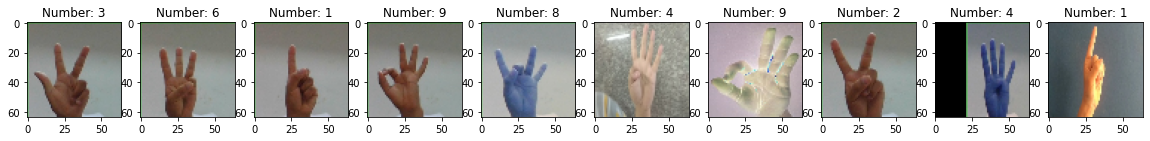

time: 1.22 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtrain.shape

(8000, 64, 64, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(6, (3, 3), input_shape=xtrain.shape[1:], activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

time: 94.7 ms


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 6)         168       
_________________________________________________________________
average_pooling2d (AveragePo (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               376440    
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

time: 20.4 ms


In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"

# Call back
mc = ModelCheckpoint(filepath, monitor ='loss', verbose = 1, save_best_only=True, mode = 'max')
es = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min',restore_best_weights=True)
sheduler_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
callbacks = [mc,es, sheduler_lr]

time: 2.8 ms


In [ ]:
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=500, batch_size=32, verbose=1, callbacks=callbacks)

Epoch 1/500
250/250 [==============================] - ETA: 0s - loss: 1.5644 - accuracy: 0.5207
Epoch 00001: loss improved from -inf to 1.56435, saving model to weights-improvement-01-0.73.h5
250/250 [==============================] - 19s 75ms/step - loss: 1.5644 - accuracy: 0.5207 - val_loss: 0.9363 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 2/500
250/250 [==============================] - ETA: 0s - loss: 0.6516 - accuracy: 0.8025
Epoch 00002: loss did not improve from 1.56435
250/250 [==============================] - 19s 75ms/step - loss: 0.6516 - accuracy: 0.8025 - val_loss: 0.6904 - val_accuracy: 0.8060 - lr: 9.0000e-04
Epoch 3/500
250/250 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8798
Epoch 00003: loss did not improve from 1.56435
250/250 [==============================] - 19s 74ms/step - loss: 0.3802 - accuracy: 0.8798 - val_loss: 0.6406 - val_accuracy: 0.8170 - lr: 8.1000e-04
Epoch 4/500
250/250 [==============================] - ETA: 0s - loss: 0.

In [ ]:
# Test Accuracy
scores = model.evaluate(xtest, steps=len(xtest), verbose=1)
print("Test Accuracy: %.2f%%"%(scores[1]*100))

In [ ]:
# Train Accuracy
scores = model.evaluate(xtrain, steps=len(xtrain), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

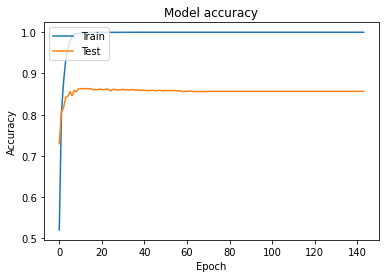

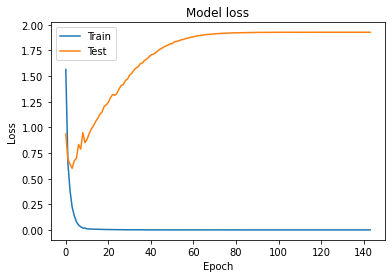

time: 385 ms


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(ytest, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'Eight', 'Nine']
print(classification_report(ytest, y_pred, target_names=target_names))

Confusion Matrix
[[198   4   3   1   2   1   0   3   2   3]
 [  1 163   9   7   1   0   3   1   1   6]
 [  1   8 176   8   2   0   2   2   2   4]
 [  2   4   5 168   2   3   2   9   1   7]
 [  0   0   3   1 164   2   2   3   1   6]
 [  0   0   0   9   8 159   2   4   2   2]
 [  1   1   6   3   9   1 197   3   7   5]
 [  1   7   8   4   5   3   5 165   5   4]
 [  2   2   2   1   8   6   5   2 160   2]
 [  3   1   0   2   4   4   5   1   2 163]]
Classification Report
              precision    recall  f1-score   support

        Zero       0.95      0.91      0.93       217
         One       0.86      0.85      0.85       192
         Two       0.83      0.86      0.84       205
       Three       0.82      0.83      0.83       203
        Four       0.80      0.90      0.85       182
        Five       0.89      0.85      0.87       186
         Six       0.88      0.85      0.86       233
       Seven       0.85      0.80      0.83       207
       Eight       0.87      0.84      0.86

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Confusion Matrix')

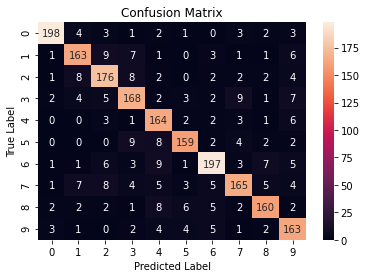

time: 2.45 s


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  851
Total number of correctly classified class:  1149
Total number testing data:  2000
time: 7.19 ms


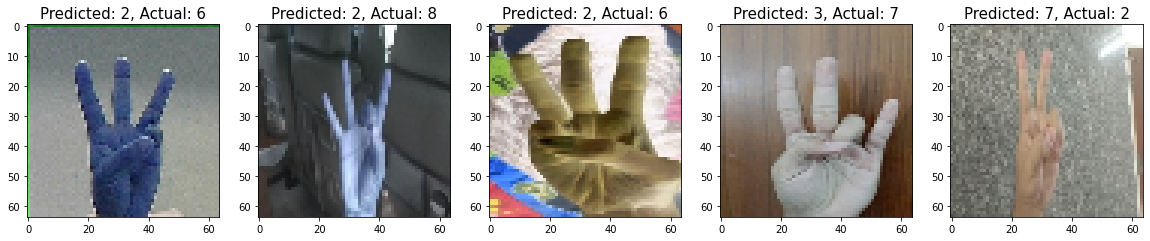

time: 755 ms


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], ytest[badIndex]), fontsize = 15)

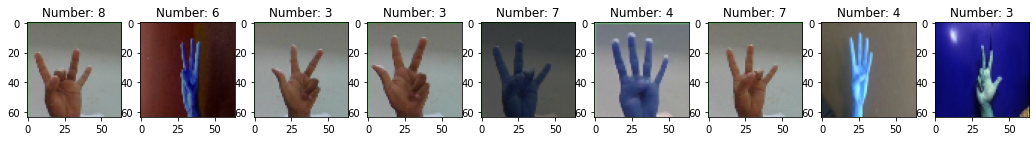

time: 1.06 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)